In [87]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
# Matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import Dataset

In [88]:
df= pd.read_csv(r'C:/Users/Pavan/Documents/Airlines/Usecase1_Dataset.csv')

df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,5/1/2017 17:32,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,4/27/2017 11:23,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,4/27/2017 11:23,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,4/27/2017 11:23,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,4/27/2017 11:23,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [89]:
# Replace all occurrences of Not Available with numpy not a number
df = df.replace({'Not Available': np.nan})

# Iterate through the columns
for col in list(df.columns):
    # Select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        df[col] = df[col].astype(float)

# Missing values at individual variable level

In [90]:
#shows the missing values at individual variable level

#df.isnull().sum() --> works same as below code
df.apply(lambda x: sum(x.isnull()), axis=0)

Order                                                             0
Property Id                                                       0
Property Name                                                     0
Parent Property Id                                                0
Parent Property Name                                              0
BBL - 10 digits                                                  11
NYC Borough, Block and Lot (BBL) self-reported                   11
NYC Building Identification Number (BIN)                        162
Address 1 (self-reported)                                         0
Address 2                                                     11539
Postal Code                                                       0
Street Number                                                   124
Street Name                                                     122
Borough                                                         118
DOF Gross Floor Area                            

In [91]:
#The Variables which can be removed are -,
vars_to_be_removed = [ 'Address 1 (self-reported)', 'Postal Code', 'Street Number', 'Street Name', 'Address 2'
 ]

df.drop(vars_to_be_removed , axis = 1, inplace=True )#inplace=True

In [92]:
#shows the total number of missing values
df.isnull().sum().sum()

141103

In [93]:
#variables which we can remove
var_null_pc = df.isnull().sum(axis=0).sort_values( ascending=False)/float(len(df) )
var_null_pc[ var_null_pc > 0.75 ]

Fuel Oil #1 Use (kBtu)                                    0.999234
Diesel #2 Use (kBtu)                                      0.998638
Fuel Oil #5 & 6 Use (kBtu)                                0.949430
District Steam Use (kBtu)                                 0.920313
Fuel Oil #4 Use (kBtu)                                    0.887536
3rd Largest Property Use Type                             0.873659
3rd Largest Property Use Type - Gross Floor Area (ft²)    0.873659
Fuel Oil #2 Use (kBtu)                                    0.780266
dtype: float64

In [94]:
df.drop( var_null_pc[ var_null_pc > 0.75 ].index, axis = 1,  ) 
df.dropna( axis = 0, thresh = 30, )

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Borough,DOF Gross Floor Area,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,Manhattan,289356.0,...,619.4,5/1/2017 17:32,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,Manhattan,3693539.0,...,404.3,4/27/2017 11:23,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,Manhattan,152765.0,...,NaN,4/27/2017 11:23,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,Manhattan,891040.0,...,NaN,4/27/2017 11:23,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,Manhattan,211400.0,...,NaN,4/27/2017 11:23,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11741,14988,4940453,Advanced: 24 Monroe Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3002380026,3-00238-0026\t,3001927,Brooklyn,70645.0,...,109.6,4/26/2017 11:20,NaN,NaN,40.696420,-73.992495,2.0,33.0,502.0,Brooklyn Heights-Cobble Hill ...
11742,14989,4940416,Advanced: 150 Joralemon St / 124 Clinton St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3002640017,3-00264-0017\t,3002539,Brooklyn,93500.0,...,153.4,4/26/2017 11:20,NaN,NaN,40.692602,-73.993231,2.0,33.0,7.0,Brooklyn Heights-Cobble Hill ...
11743,14990,4628296,(9267) - 267 Sixth St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3009870001​,3-00987-0001​,3413788; 3021326,NaN,NaN,...,103.6,3/23/2017 14:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11744,14991,4940464,Advanced: 27 Prospect Park West,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3010720040,3-01072-0040\t,3024968;3824680,Brooklyn,57824.0,...,92.7,4/26/2017 11:20,NaN,NaN,40.670728,-73.971752,6.0,39.0,165.0,Park Slope-Gowanus ...


In [95]:
df.shape

(11746, 55)

In [96]:
# function to calculate missing values by column
def missing_values_table(df):
    #total mising values
    mis_val=df.isnull().sum()
    #% of missing values
    mis_val_percent=100*df.isnull().sum()/len(df)
    #make a table with results
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis=1)
    #rename columns
    mis_val_table_ren_columns=mis_val_table.rename(columns={0:'missing values',1:'% of total values'})
    #sort the table by % of missing descending
    mis_val_table_ren_columns=mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of total values',ascending=False).round(1)
    #print some summery
    print('your data has ' + str(df.shape[1]) + " columns."
         'there are ' + str(mis_val_table_ren_columns.shape[0]) + ' columns has missing values')
    return mis_val_table_ren_columns

In [97]:
missing_values_table(df)

your data has 55 columns.there are 43 columns has missing values


,missing values,% of total values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2
2nd Largest Property Use - Gross Floor Area (ft²),8005,68.2


In [98]:
#get missing values > 50% missing
missing_df = missing_values_table(df);
missing_columns=list(missing_df[missing_df['% of total values'] > 50].index)

print(' Delete %d Variable.' %len(missing_columns))

your data has 55 columns.there are 43 columns has missing values
 Delete 10 Variable.


In [99]:
#drop columns
df=df.drop(columns=list(missing_columns))

In [100]:
df.dropna(inplace=True)

In [101]:
nulls = df.isnull().sum()
nulls[nulls > 0]

Series([], dtype: int64)

#### categorical variables

In [102]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 16 categorical variables


#### Numerical variables

In [103]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 29 numerical variables


In [104]:
df[categorical].columns

Index(['Property Name', 'Parent Property Id', 'Parent Property Name',
       'BBL - 10 digits', 'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Borough',
       'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type', 'Metered Areas (Energy)',
       'Metered Areas  (Water)', 'Release Date', 'Water Required?',
       'DOF Benchmarking Submission Status', 'NTA'],
      dtype='object')

# One hot encoding

In [105]:
cat=['Property Name', 'Parent Property Id', 'Parent Property Name',
       'BBL - 10 digits', 'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Borough',
       'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type', 'Metered Areas (Energy)',
       'Metered Areas  (Water)', 'Release Date', 'Water Required?',
       'DOF Benchmarking Submission Status', 'NTA']

In [106]:
from sklearn import preprocessing
le =preprocessing.LabelEncoder()
for var in cat:
    le = preprocessing.LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))
df.dtypes

Order                                                           int64
Property Id                                                     int64
Property Name                                                   int32
Parent Property Id                                              int32
Parent Property Name                                            int32
BBL - 10 digits                                                 int32
NYC Borough, Block and Lot (BBL) self-reported                  int32
NYC Building Identification Number (BIN)                        int32
Borough                                                         int32
DOF Gross Floor Area                                          float64
Primary Property Type - Self Selected                           int32
List of All Property Use Types at Property                      int32
Largest Property Use Type                                       int32
Largest Property Use Type - Gross Floor Area (ft²)            float64
Year Built          

In [107]:
#df['ENERGY_Score'].fillna(df['ENERGY_Score'].mean(), inplace = True)
#df = (df,columns=['ENERGY_Score'])
#df[['ENERGY_Score']].apply(pd.Series.round)

In [108]:
df[numerical].columns

Index(['Order', 'Property Id', 'DOF Gross Floor Area',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy', 'ENERGY_Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Weather Normalized Site Electricity (kWh)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Indirect GHG Emissions (Metric Tons CO2e)',
       'Property GFA - Self-Reported (ft²)',
       'Water Use (All Water Sources) (kgal)',
       'Water Intensity (All Water Sources) (gal/ft²)',
       'Source EUI (kBtu/ft²)', 'Latitude', 'Longitu

# Renaming Columns if Required

In [109]:
'''df.rename(columns = {'NYC Borough, Block and Lot (BBL) self-reported':'BBL',
           'NYC Building Identification Number (BIN)':'BIN',
        'List of All Property Use Types at Property': 'List_Property_USE_TYPE',
           'DOF Benchmarking Submission Status':'Benchmark status','Metered Areas (Energy)': 'Metered Energy',
       'Metered Areas  (Water)': 'Metered Water','Primary Property Type - Self Selected': 'Primary Property Type',
           
       'Largest Property Use Type - Gross Floor Area (ft²)':'Property_Gross Floor Area', 
       'Number of Buildings - Self-reported':'No of Buildings',  'ENERGY STAR Score': 'Score',
       'Site EUI (kBtu/ft²)': 'Site EUI', 'Weather Normalized Site EUI (kBtu/ft²)': 'Weather_Site EUI',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)': 'Electricity Intensity',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)': 'Natural Gas Intensity',
       'Weather Normalized Source EUI (kBtu/ft²)':'Source EUI' , 
       'Weather Normalized Site Natural Gas Use (therms)':'Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)': 'Electricity Use',
       'Weather Normalized Site Electricity (kWh)':'Site Electricity (kWh)',
       'Total GHG Emissions (Metric Tons CO2e)': 'Total GHG Emission',
       'Direct GHG Emissions (Metric Tons CO2e)':'Direct GHG Emission',
       'Indirect GHG Emissions (Metric Tons CO2e)': 'Indirect GHG Emissions',
       'Property GFA - Self-Reported (ft²)':'Property GFA',
       'Water Use (All Water Sources) (kgal)':'Water Use',
       'Water Intensity (All Water Sources) (gal/ft²)': 'Water Intensity',
       'Source EUI (kBtu/ft²)':'Source EUI'}, inplace = True)'''
   



df.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY_Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',

In [110]:
df.dtypes

Order                                                           int64
Property Id                                                     int64
Property Name                                                   int32
Parent Property Id                                              int32
Parent Property Name                                            int32
BBL - 10 digits                                                 int32
NYC Borough, Block and Lot (BBL) self-reported                  int32
NYC Building Identification Number (BIN)                        int32
Borough                                                         int32
DOF Gross Floor Area                                          float64
Primary Property Type - Self Selected                           int32
List of All Property Use Types at Property                      int32
Largest Property Use Type                                       int32
Largest Property Use Type - Gross Floor Area (ft²)            float64
Year Built          

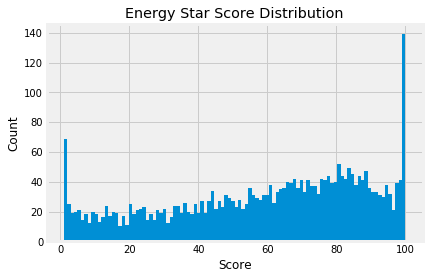

In [111]:
#Distribution of Energy Star Scores

# Histogram of Energy Star Scores with 100 bins
plt.hist(df['ENERGY_Score'].dropna(), bins = 100);
plt.title('Energy Star Score Distribution');
plt.xlabel('Score'); plt.ylabel('Count');


Text(0.5, 1.0, 'Energy Star Score Distribution')

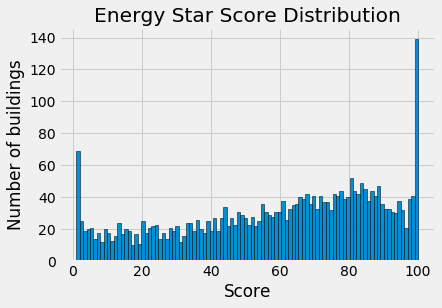

In [112]:

# Histogram for the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(df['ENERGY_Score'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Score')
plt.ylabel('Number of buildings')
plt.title('Energy Star Score Distribution')

In [113]:
# dropping column with all null values 
#df.dropna(axis = 1, how ='all', inplace = True) 

In [114]:
#Shows unique Scores
df.ENERGY_Score.unique()

array([  1.,  81.,   3., 100.,  66.,  14.,  98.,  64.,   8.,  84.,  76.,
        90.,  79.,  54.,  26.,  80.,  86.,  73.,  46.,  68.,  16.,  10.,
        88.,  71.,  89.,  58.,  24.,  93.,  67.,  32.,   4.,   5.,  62.,
        27.,  23.,   6.,  17.,  18.,  95.,  31.,  87.,  28.,  12.,  72.,
        36.,  45.,  11.,  75.,  39.,  63.,  21.,   2.,  91.,  47.,  29.,
        35.,  57.,  83.,  38.,  94.,  78.,  56.,  61.,  19.,  77.,  65.,
        48.,  60.,  59.,   7.,  85.,  34.,  37.,  49.,  74.,  99.,  82.,
        15.,  92.,  44.,  53.,  55.,   9.,  13.,  25.,  33.,  41.,  43.,
        96.,  69.,  30.,  20.,  70.,  40.,  42.,  51.,  50.,  52.,  22.,
        97.])

In [115]:
df.dtypes

Order                                                           int64
Property Id                                                     int64
Property Name                                                   int32
Parent Property Id                                              int32
Parent Property Name                                            int32
BBL - 10 digits                                                 int32
NYC Borough, Block and Lot (BBL) self-reported                  int32
NYC Building Identification Number (BIN)                        int32
Borough                                                         int32
DOF Gross Floor Area                                          float64
Primary Property Type - Self Selected                           int32
List of All Property Use Types at Property                      int32
Largest Property Use Type                                       int32
Largest Property Use Type - Gross Floor Area (ft²)            float64
Year Built          

In [116]:
#internal ipython tool for setting figsize
from IPython.core.pylabtools import figsize

Text(0.5, 1.0, 'Site EUI Distribution')

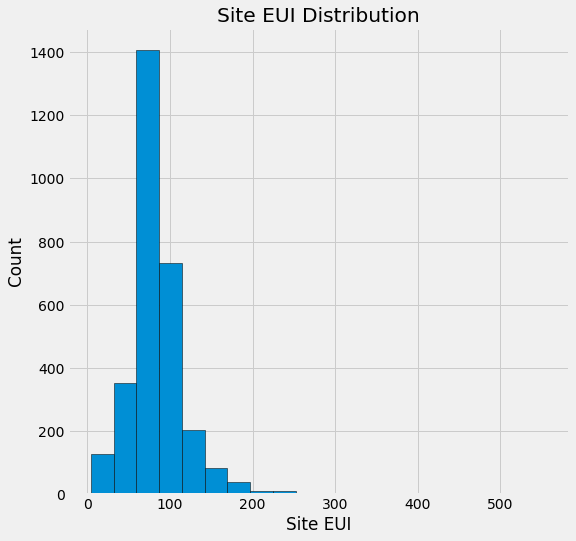

In [117]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(df['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution')

In [118]:
df['Site EUI (kBtu/ft²)'].describe()

count    2980.000000
mean       83.846678
std        35.896414
min         4.000000
25%        65.675000
50%        79.100000
75%        96.700000
max       555.800000
Name: Site EUI (kBtu/ft²), dtype: float64

In [119]:
# No outliers
df['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

11648    260.9
1558     292.9
6929     303.7
11444    311.5
1639     313.3
7967     326.9
11646    329.1
148      388.3
3085     424.7
99       555.8
Name: Site EUI (kBtu/ft²), dtype: float64

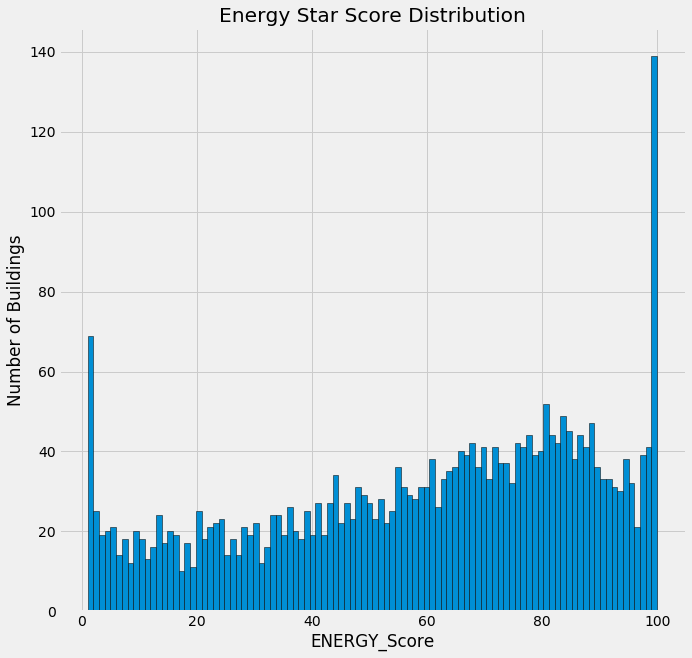

In [120]:
figsize(10, 10)
# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(df['ENERGY_Score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('ENERGY_Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

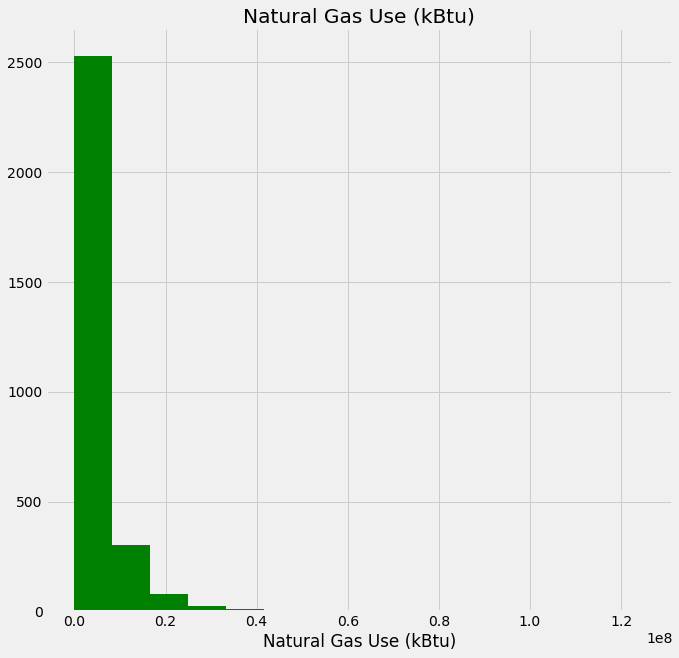

In [121]:

plt.hist(df['Natural Gas Use (kBtu)'], bins=15, color='green')
plt.title('Natural Gas Use (kBtu)')
plt.xlabel("Natural Gas Use (kBtu)")
plt.show()


In [122]:
df['Natural Gas Use (kBtu)'].describe()

count    2.980000e+03
mean     5.440018e+06
std      8.612458e+06
min      0.000000e+00
25%      8.348870e+05
50%      3.904706e+06
75%      6.262078e+06
max      1.250000e+08
Name: Natural Gas Use (kBtu), dtype: float64

In [123]:
df['Natural Gas Use (kBtu)'].dropna().sort_values().tail(10)

7211     75800000.0
5575     77700000.0
4886     79400000.0
3246     82529240.0
2313     82927866.0
2312     86700000.0
3602     90300000.0
2361     98046006.0
8209    117000000.0
2375    125000000.0
Name: Natural Gas Use (kBtu), dtype: float64

In [124]:
df.loc[df['Natural Gas Use (kBtu)'] == 125000000.0,:]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Borough,DOF Gross Floor Area,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
2375,2778,3351449,1061,8,6,546,368,428,2,1800000.0,...,296.5,238,1,0,40.758267,-73.985468,5.0,3.0,119.0,72


In [125]:
# Calculate first and third quartile
first_quartile = df['Natural Gas Use (kBtu)'].describe()['25%']
third_quartile = df['Natural Gas Use (kBtu)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
df = df[(df['Natural Gas Use (kBtu)'] > (first_quartile - 3 * iqr)) &
            (df['Natural Gas Use (kBtu)'] < (third_quartile + 3 * iqr))]

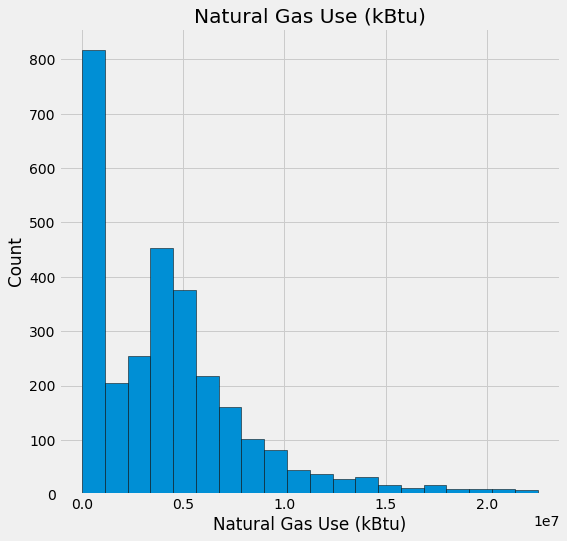

In [126]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(df['Natural Gas Use (kBtu)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Natural Gas Use (kBtu)'); 
plt.ylabel('Count'); plt.title('Natural Gas Use (kBtu)');

In [127]:
# Create a list of boroughs with more than 100 observations
boroughs = df.dropna(subset=['ENERGY_Score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

In [128]:
# Find all correlations with the score and sort 
correlations_data = df.corr()['ENERGY_Score'].sort_values()

In [129]:
# Find all correlations and sort 
correlations_df= df.corr()['ENERGY_Score'].sort_values()

# Print the most negative correlations
print(correlations_df.head(15), '\n')

# Print the most positive correlations
print(correlations_df.tail(15))

Weather Normalized Site EUI (kBtu/ft²)                       -0.654185
Site EUI (kBtu/ft²)                                          -0.653914
Weather Normalized Source EUI (kBtu/ft²)                     -0.563489
Source EUI (kBtu/ft²)                                        -0.555998
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.348912
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.320957
Direct GHG Emissions (Metric Tons CO2e)                      -0.266675
Natural Gas Use (kBtu)                                       -0.261806
Weather Normalized Site Natural Gas Use (therms)             -0.256101
Year Built                                                   -0.147401
Property Id                                                  -0.119774
Total GHG Emissions (Metric Tons CO2e)                       -0.087116
Electricity Use - Grid Purchase (kBtu)                       -0.041316
Weather Normalized Site Electricity (kWh)                    -0.041095
Indire

In [131]:
# Display most negative correlations
correlations.head(15)


sqrt_Site EUI (kBtu/ft²)                                       -0.678594
sqrt_Weather Normalized Site EUI (kBtu/ft²)                    -0.673014
Weather Normalized Site EUI (kBtu/ft²)                         -0.654185
Site EUI (kBtu/ft²)                                            -0.653914
log_Weather Normalized Source EUI (kBtu/ft²)                   -0.639282
log_Site EUI (kBtu/ft²)                                        -0.636749
log_Source EUI (kBtu/ft²)                                      -0.636280
sqrt_Weather Normalized Source EUI (kBtu/ft²)                  -0.630349
log_Weather Normalized Site EUI (kBtu/ft²)                     -0.628100
sqrt_Source EUI (kBtu/ft²)                                     -0.624651
Weather Normalized Source EUI (kBtu/ft²)                       -0.563489
Source EUI (kBtu/ft²)                                          -0.555998
log_Weather Normalized Site Electricity Intensity (kWh/ft²)    -0.437974
sqrt_Weather Normalized Site Electricity Intensity 

In [136]:
df.shape

(2889, 45)

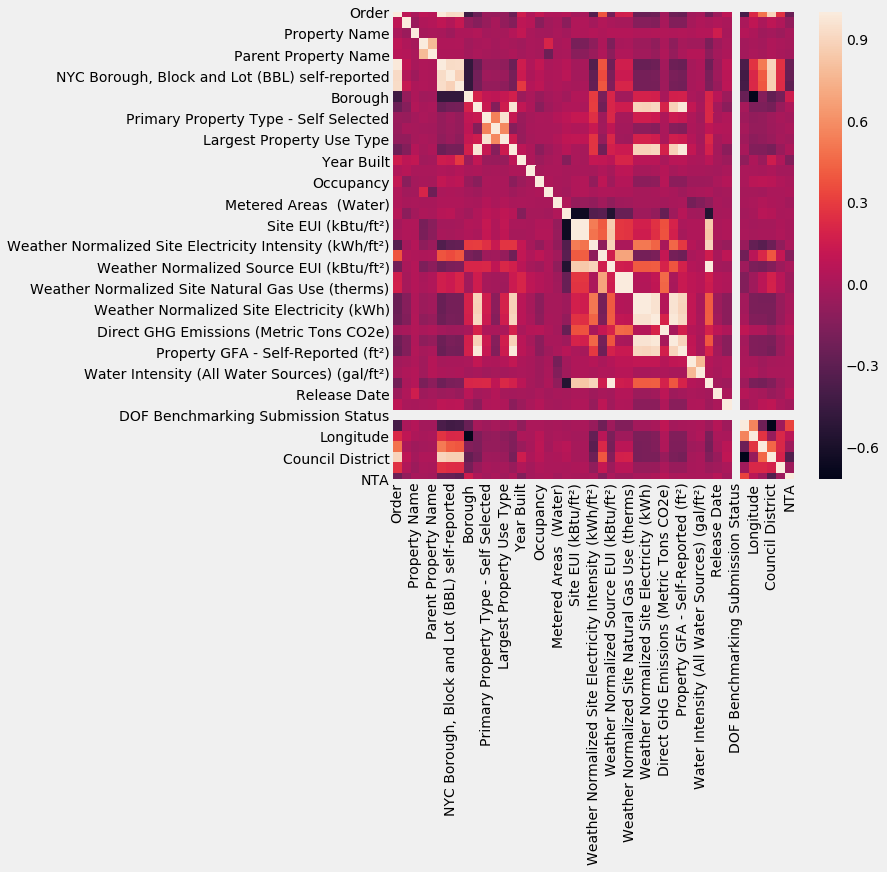

In [138]:
#plot the above correlation result
sns.heatmap(df.corr()) 

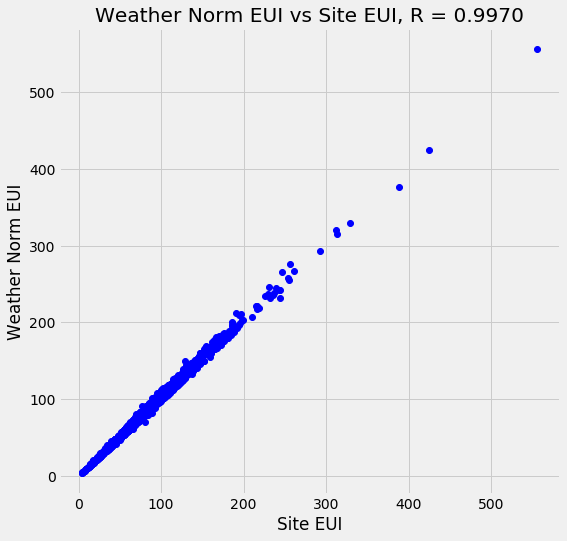

In [139]:
plot_df = df[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_df['Site EUI (kBtu/ft²)'], plot_df['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI'); plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(df[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);

In [140]:
df.shape

(2889, 45)

In [141]:
df['ENERGY_Score'] = df['ENERGY_Score'].apply(np.int64)

In [142]:
df.dtypes

Order                                                           int64
Property Id                                                     int64
Property Name                                                   int32
Parent Property Id                                              int32
Parent Property Name                                            int32
BBL - 10 digits                                                 int32
NYC Borough, Block and Lot (BBL) self-reported                  int32
NYC Building Identification Number (BIN)                        int32
Borough                                                         int32
DOF Gross Floor Area                                          float64
Primary Property Type - Self Selected                           int32
List of All Property Use Types at Property                      int32
Largest Property Use Type                                       int32
Largest Property Use Type - Gross Floor Area (ft²)            float64
Year Built          

In [143]:
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Borough,DOF Gross Floor Area,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
99,102,2605684,2192,0,2,1402,1498,1125,2,230565.0,...,969.0,1093,0,0,40.842476,-73.942863,12.0,10.0,255.0,115
103,106,2741656,414,0,2,1406,1499,1129,2,84442.0,...,159.6,1093,0,0,40.845958,-73.942539,12.0,10.0,255.0,115
148,152,2779662,2422,1,5,78,58,53,2,102314.0,...,721.5,1196,1,0,40.732082,-73.985127,3.0,2.0,40.0,39
161,165,2809891,1242,2,1,1298,1472,1033,2,87979.0,...,26.3,461,1,0,40.809066,-73.959408,9.0,7.0,20701.0,74
327,336,4994375,2632,5,8,1173,775,944,2,449973.0,...,63.9,1061,1,0,40.815502,-73.935614,11.0,9.0,210.0,34


In [144]:
df['Number of Buildings - Self-reported'].value_counts()

1    2864
2      19
8       2
6       2
4       2
Name: Number of Buildings - Self-reported, dtype: int64

# Splitting Train and Test Data

In [145]:

Y=df.ENERGY_Score
X=df.drop('ENERGY_Score',axis=1)

In [146]:
X.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Weather

In [147]:
X = df.loc[:,df.columns != 'ENERGY_Score']
Y = df.ENERGY_Score

feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [148]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [149]:
def mae(y_test,y_pred):
    return np.mean(abs(y_test - y_pred ))

def fit_and_evaluate(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    model_mae = mae(y_test,y_pred)
    return model_mae

In [150]:
# Applicaiton of Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)
print('MAE of Linear Regression is %0.4f'%lr_mae)

MAE of Linear Regression is 15.7908


In [151]:
# Applicaiton of SVR

from sklearn.svm import SVR
svr = SVR(C=1000, gamma=0.1)

svr_mae = fit_and_evaluate(svr)
print('MAE of SVR is %0.4f'%svr_mae)

MAE of SVR is 23.8355


In [152]:
# Applicaiton of Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=60)

rf_mae = fit_and_evaluate(rf)
print('MAE of Random Forest Regression is %0.4f'%rf_mae)

C:\Users\Pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE of Random Forest Regression is 9.6946


In [153]:
# Applicaiton of Gradiant Boosting

from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=60)

gb_mae = fit_and_evaluate(gb)
print('MAE of Gradiant Boosting is %0.4f'%gb_mae)

MAE of Gradiant Boosting is 9.0761


In [154]:
# Applicaiton of K-Nearest Neighbors Regression
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=6)
knr_mae = fit_and_evaluate(knr)
print('MAE of K-Nearest Neighbors Regression is %0.4f'%knr_mae)

MAE of K-Nearest Neighbors Regression is 21.1801


In [155]:

ml_df = pd.DataFrame({'Model' : ['Linear Regression', 'SVR', 'Random Forest', 'Gradiant Boosting', 'KNN Regression'], 
                      'Values' : [lr_mae, svr_mae, rf_mae, gb_mae, knr_mae ]})

In [156]:
ml_df = ml_df.sort_values('Values', ascending = True)
ml_df

,Model,Values
3,Gradiant Boosting,9.076072
2,Random Forest,9.694579
0,Linear Regression,15.790810
4,KNN Regression,21.180123
1,SVR,23.835469


Text(0.5, 1.0, 'Comparision of different Models')

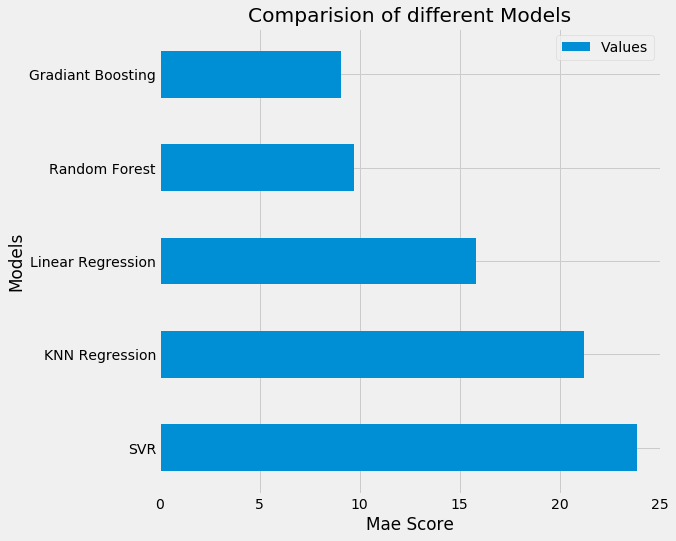

In [157]:
ml_df.sort_values('Values', ascending = False).plot(x= 'Model', y = 'Values', kind = 'barh' )
plt.xlabel('Mae Score')
plt.ylabel('Models')
plt.title('Comparision of different Models')

# ML models Gradiant Boosting showed the best MAE score of 9.07

In [86]:

# Grades from Energy Star Score as Below

def determine_grade(df,ENERGY_Score):
    if scores >= 85 and scores <= 100:
        return 'A'
    elif scores >= 70 and scores <= 85:
        return 'B'
    elif scores >= 55 and scores <= 70:
        return 'C'
    elif scores >= 50:
        return 'D'
    else:
        return 'Failed to submit'

# END 